<a href="https://colab.research.google.com/github/darstech/ML-Foundation/blob/main/notebooks/batch_regression_gradient.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ref: [John Krohn Github](https://github.com/jonkrohn/ML-foundations/blob/master/notebooks/batch-regression-gradient.ipynb)

# Gradient of Cost on a Batch of Data

In this notebook, we expand on the partial derivative calculus of the [*Single Point Regression Gradient* notebook](https://github.com/darstech/ML-Foundation/blob/main/notebooks/single_point_regression_gradient.ipynb) to: 

* Calculate the gradient of mean squared error on a batch of data
* Visualize gradient descent in action

In [38]:
import torch
import matplotlib.pyplot as plt

In [39]:
xs = torch.tensor([0, 1, 2, 3, 4, 5, 6, 7.])
ys = torch.tensor([1.86, 1.31, .62, .33, .09, -.67, -1.23, -1.37])

In [40]:
def regression(my_x, my_m, my_b):
  return my_m*my_x + my_b

In [41]:
m = torch.tensor([0.9]).requires_grad_()
b = torch.tensor([0.1]).requires_grad_()

**Step 1**: Forward pass

In [42]:
yhat = regression(xs, m, b)
yhat

tensor([0.1000, 1.0000, 1.9000, 2.8000, 3.7000, 4.6000, 5.5000, 6.4000],
       grad_fn=<AddBackward0>)

**Step 2**: Compare $\hat{y}$ with true $y$ to calculate cost $C$

As in the [*Regression in PyTorch* notebook](https://github.com/darstech/ML-Foundation/blob/main/notebooks/regression_in_pytorch.ipynb), let's use mean squared error, which averages quadratic cost across multiple data points: $$C = \frac{1}{n} \sum_{i=1}^n (\hat{y_i}-y_i)^2 $$

In [43]:
def mse(my_yhat, my_y):
  sigma = torch.sum((my_yhat - my_y)**2)
  return sigma/len(my_y)

In [44]:
C = mse(yhat, ys)
C

tensor(19.6755, grad_fn=<DivBackward0>)

**Step 3**: Use autodiff to calculate gradient of $C$ w.r.t. parameters

In [45]:
C.backward()

In [46]:
m.grad

tensor([36.3050])

In [47]:
b.grad

tensor([6.2650])

**Manually derive $\frac{\partial C}{\partial m}$ and $\frac{\partial C}{\partial b}$.**

$$ \frac{\partial C}{\partial m} = \frac{2}{n} \sum (\hat{y}_i - y_i) \cdot x_i $$

In [48]:
2/len(ys)*torch.sum((yhat - ys)*xs)

tensor(36.3050, grad_fn=<MulBackward0>)

$$ \frac{\partial C}{\partial b} = \frac{2}{n} \sum (\hat{y}_i - y_i) $$

In [49]:
2/len(ys) * torch.sum( yhat - ys)

tensor(6.2650, grad_fn=<MulBackward0>)

In [50]:
gradients = torch.tensor([[b.grad.item(), m.grad.item()]]).T
gradients

tensor([[ 6.2650],
        [36.3050]])

Let's visualize the most pertinent metrics in a single plot: 

In [51]:
def labelled_regression_plot(my_x, my_y, my_m, my_b, my_C, include_grad=True):
  title = 'Cost = {}'.format('%.3g' % my_C.item())
  if include_grad:
    xlabel = 'm = {}, m grad = {}'.format('%.3g' % my_m.item(), '%.3g' % my_m.grad.item())
    ylabel = 'b = {}, b grad {}'.format('%.3g' % my_b.item(), '%.3g' % my_b.grad.item())
  else:
    xlabel = 'm = {}'.format('%.3g' % my_m.item())
    ylabel = 'b = {}'.format('%.3g' % b.item())

  fix, ax = plt.subplots()

  plt.title(title)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)

  ax.scatter(my_x, my_y)

  x_min, x_max = ax.get_xlim()
  y_min = regression(x_min, my_m, my_b).detach().item()
  y_max = regression(x_max, my_m, my_b).detach().item()

  ax.set_xlim([x_min, x_max])
  _ = plt.plot([x_min, x_max], [y_min, y_max], c='C01')

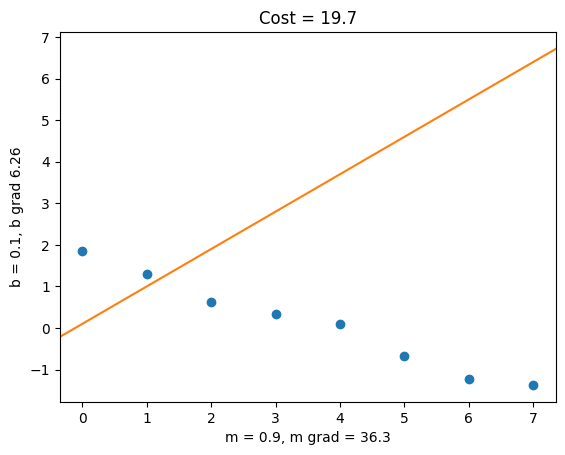

In [52]:
# With randomly initialized model parameters (m & b)
labelled_regression_plot(xs, ys, m, b, C)

**Step 4**: Gradient descent

$\frac{\partial C}{\partial m} = 36.3$ indicates that an increase in $m$ corresponds to a large increase in $C$. 

Meanwhile, $\frac{\partial C}{\partial b} = 6.26$ indicates that an increase in $b$ also corresponds to an increase in $C$, though much less so than $m$.

In the first round of training, the lowest hanging fruit with respect to reducing cost $C$ is therefore to decrease the slope of the regression line, $m$. There will also be a relatively small decrease in the $y$-intercept of the line, $b$. 

In [53]:
# Initiaze optimizer
optimzer = torch.optim.SGD([m, b], lr=0.01)

In [54]:
# Perform single optimization step (Performs gradient descent)
optimzer.step()

In [55]:
# Step 1 & 2 (Forward pass + Calculation of Cost)
C = mse(regression(xs, m, b), ys)

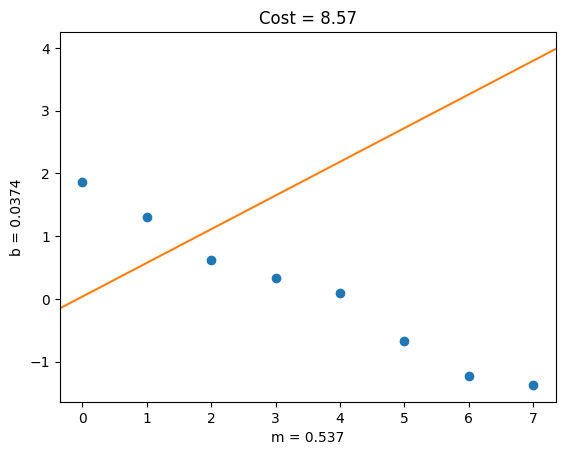

In [56]:
labelled_regression_plot(xs, ys, m, b, C, include_grad=False) # Gradient of C hasn't been recalculated

### Rinse and Repeat

Observe further rounds of training: 

In [59]:
epochs = 8
for epoch in range(epochs):

  optimzer.zero_grad()  # Reset gradients to zero; else they accumulate

  yhats = regression(xs, m, b)  # Step - 1
  C = mse(yhats , ys)           # Step - 2

  C. backward()                 # Step - 3

  labelled_regression_plot(xs, ys, m, b, C)

  optimzer.step()               # Step - 4

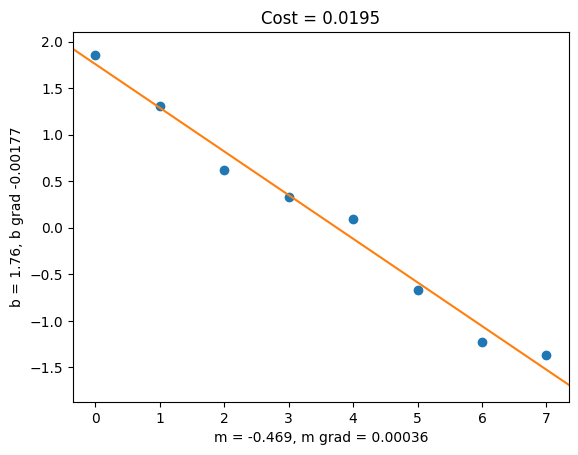

In [60]:
# At 1000 epochs
#labelled_regression_plot(xs, ys, m, b, C)